In [1]:
%pylab inline
matplotlib.style.use("ggplot")
import pandas as pd
f = pd.read_csv("https://www.open-data-aktionsplan.de/sites/default/files/ideen_odap15_1.csv", delimiter=";", encoding="iso-8859-1")

Populating the interactive namespace from numpy and matplotlib


In [2]:
f.columns

Index([u'Nummer', u'Titel', u'Idee', u'Kategorie', u'Ideengeber', u'Likes', u'Dislikes', u'Kommentare', u'Kommentar 1', u'Autor Kommentar 1', u'Zeitpunkt Kommentar 1', u'Kommentar 2', u'Autor Kommentar 2', u'Zeitpunkt Kommentar 2', u'Kommentar 3', u'Autor Kommentar 3', u'Zeitpunkt Kommentar 3', u'Kommentar 4', u'Autor Kommentar 4', u'Zeitpunkt Kommentar 4', u'Kommentar 5', u'Autor Kommentar 5', u'Zeitpunkt Kommentar 5', u'Kommentar 6', u'Autor Kommentar 6', u'Zeitpunkt Kommentar 6', u'Kommentar 7', u'Autor Kommentar 7', u'Zeitpunkt Kommentar 7', u'Kommentar 8', u'Autor Kommentar 8', u'Zeitpunkt Kommentar 8'], dtype='object')

In [3]:
# Nicht alle Spalten sind von Belang
data = f[[ "Kategorie", "Likes", "Dislikes", "Kommentare"]]

In [4]:
data.describe()

,Likes,Dislikes,Kommentare
count,254.000000,254.000000,253.000000
mean,9.500000,0.610236,0.920949
std,8.632483,1.322373,1.448068
min,0.000000,0.000000,0.000000
25%,4.000000,0.000000,0.000000
50%,7.000000,0.000000,0.000000
75%,12.000000,1.000000,1.000000
max,56.000000,10.000000,8.000000


# Histogramme für Likes, Dislikes & Kommentare

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff66e0e11d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7ff66e091190>]], dtype=object)

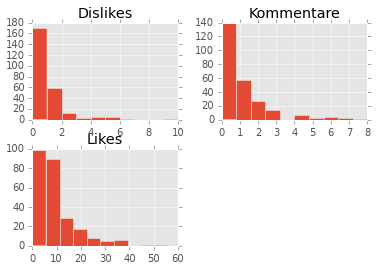

In [5]:
data.hist()

# Verteilung der Likes, Dislikes & Kommentare auf die Kategorien

In [6]:
data.groupby("Kategorie").sum()

,Likes,Dislikes,Kommentare
Kategorie,,,
(Netz-)Infrastrukturen,495,28,50
Energiewende,78,2,7
Klimawandel und Klimaschutz,84,0,3
Sonstiges,992,64,107
Verkehr und MobilitÃ¤t,337,17,32
demographischer Wandel,79,13,10
verkehr und MobilitÃ¤t,15,0,1
Ã¶ffentliche Einnahmen und Ausgaben,333,31,23


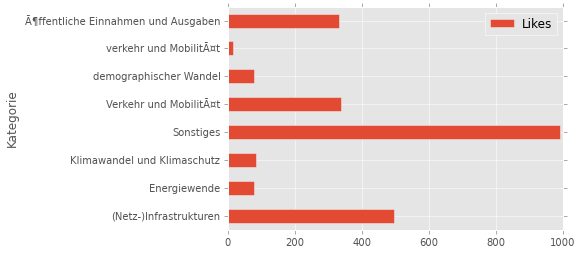

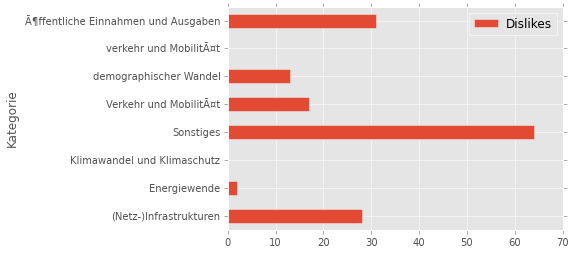

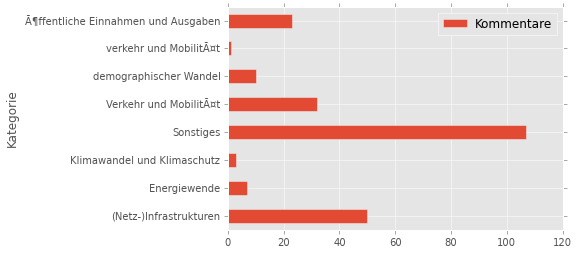

In [7]:
for x in ("Likes", "Dislikes", "Kommentare"):
    data[["Kategorie", x]].groupby("Kategorie").sum().plot(kind="barh")

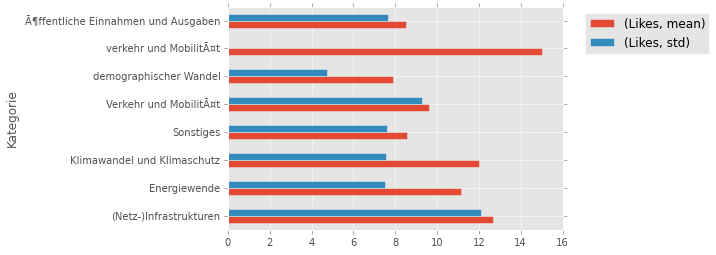

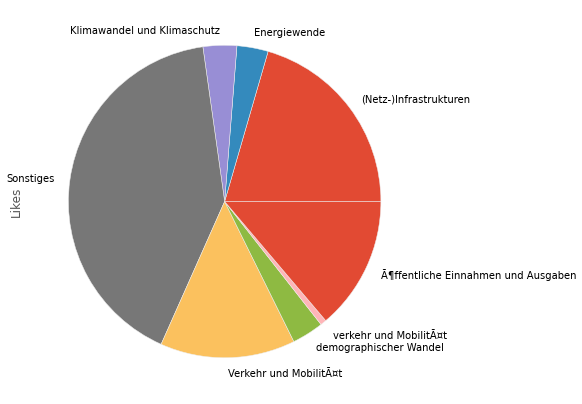

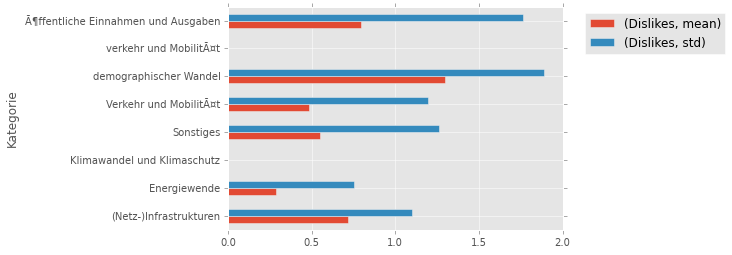

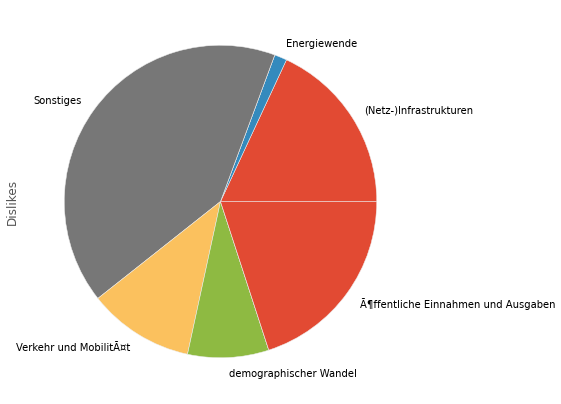

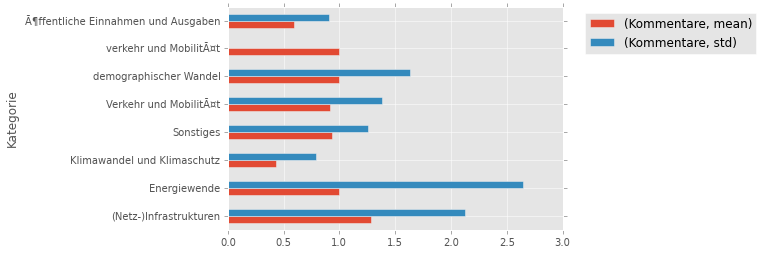

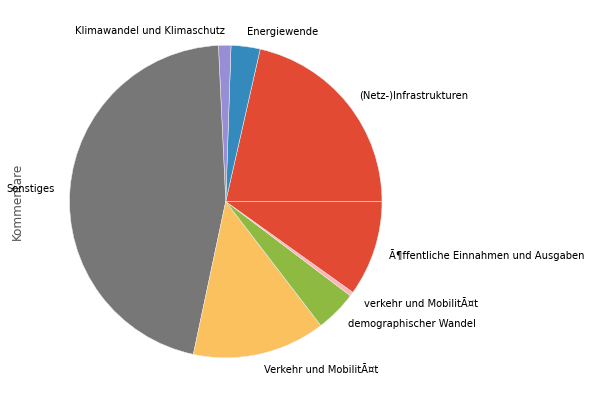

In [8]:
for x in ("Likes", "Dislikes", "Kommentare"):
    slice = data[[x, "Kategorie"]].groupby("Kategorie")
    slice.agg([np.mean, np.std]).plot(kind="barh")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
    slice.sum().plot(kind="pie", subplots=True, figsize=(7,7), legend=False)

# Nutzerstatistiken

In [10]:
ndata = f[["Ideengeber", "Likes", "Dislikes", "Titel"]]

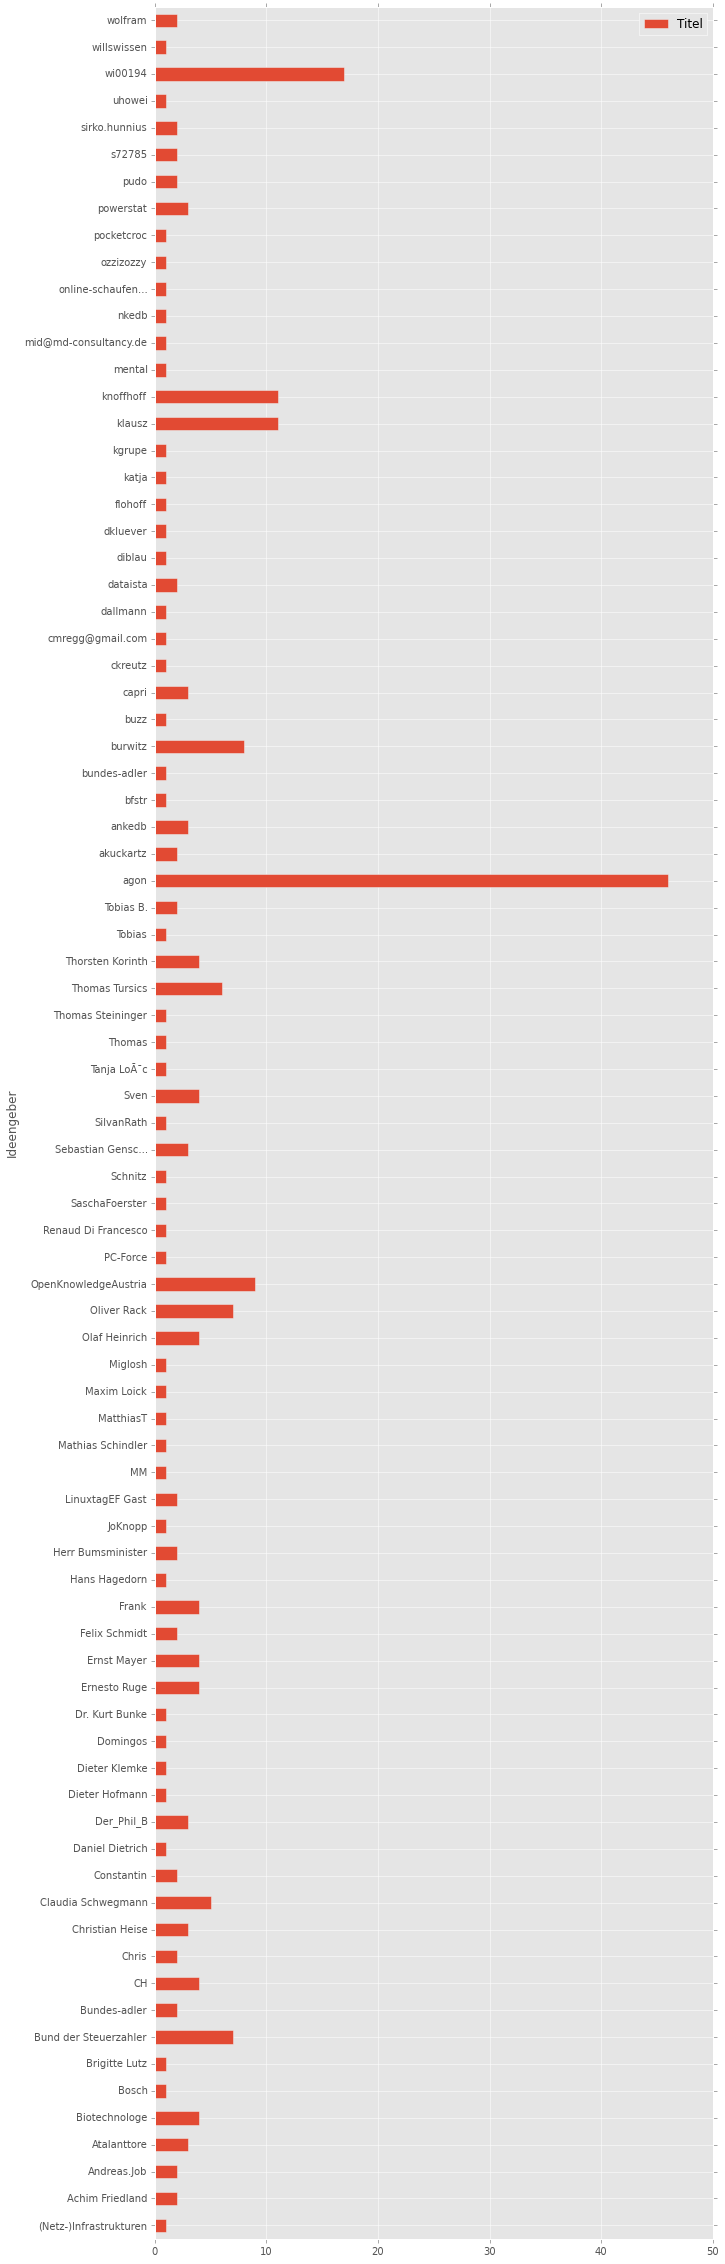

In [32]:
ndata[["Ideengeber", "Titel"]].groupby("Ideengeber").count().plot(kind="barh", figsize=(10,40))

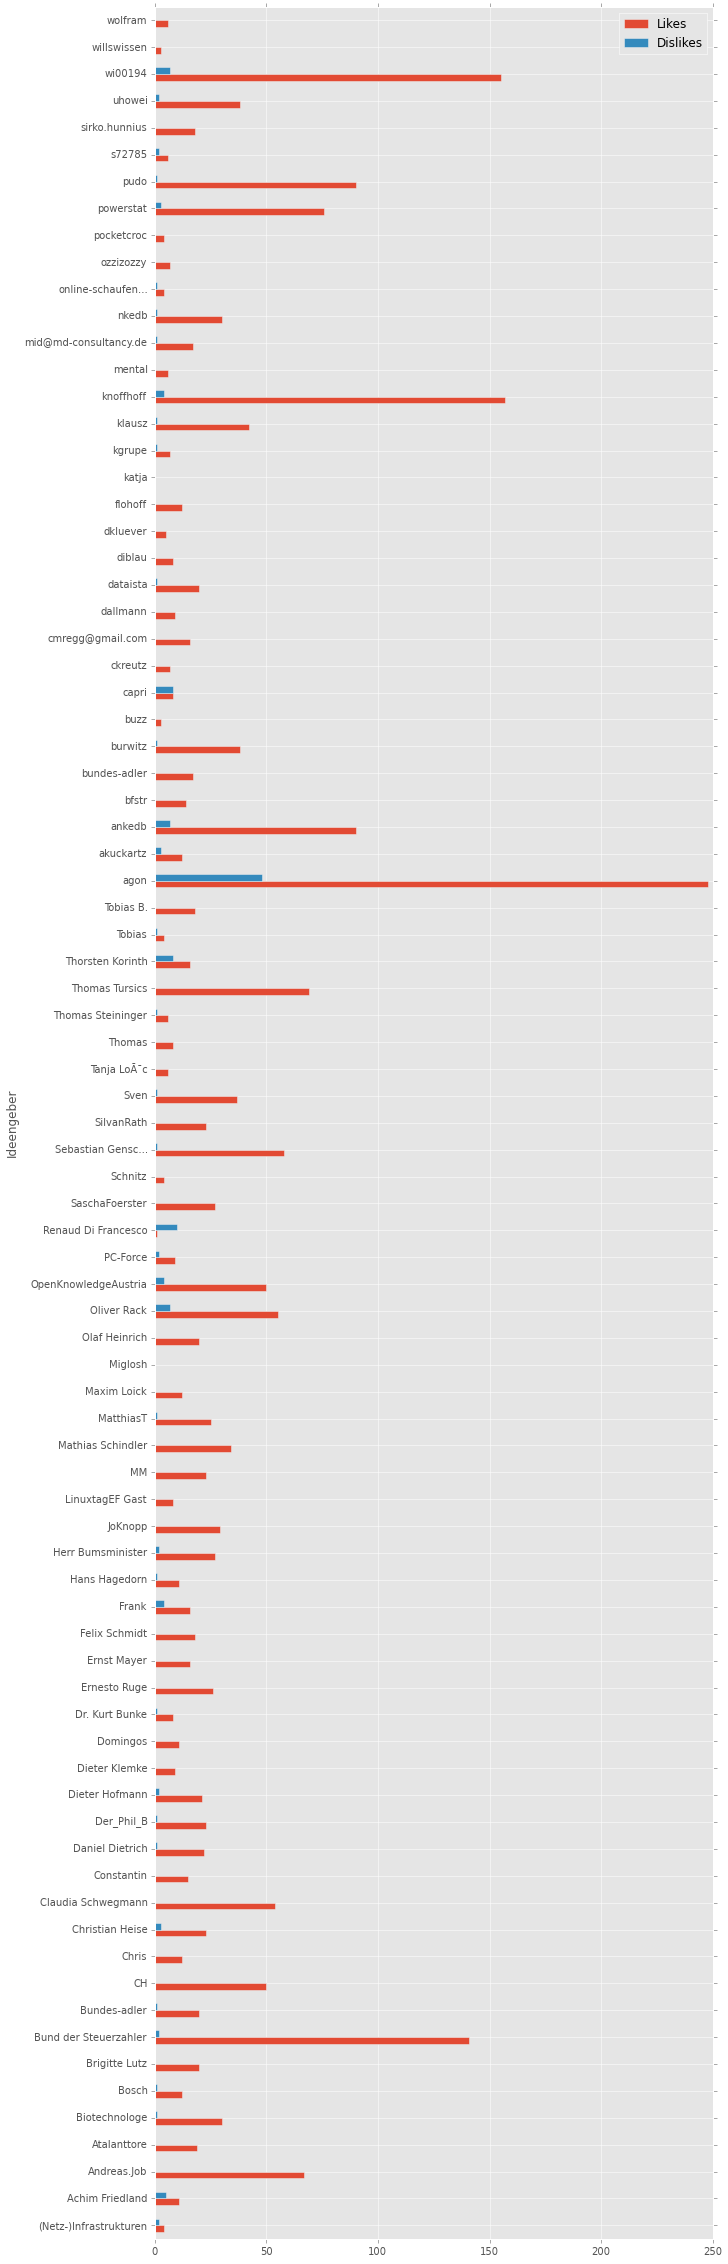

In [30]:
ndata[["Ideengeber", "Likes", "Dislikes"]].groupby("Ideengeber").sum().plot(kind="barh", figsize=(10,40))